<a href="https://colab.research.google.com/github/mangleshpatidar/DO101-apps/blob/master/SmaiAss1Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



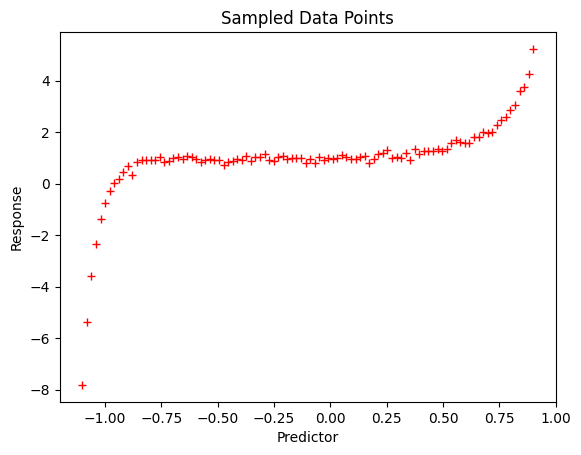

In [2]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1
    return x, y

predictor, response = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [43]:
predictor.shape
response.shape

(100,)

In [3]:
class LR:
    def __init__(self):
        self.m = None
        self.b = None
    def fit(self,X_train,y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)
    def predict(self,X_test):

      return self.m * X_test + self.b

In [4]:

class PolynomialRegression:
    def __init__(self):
        pass

    def fit(self, X, y, degree):
        self.degree = degree
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])

        self.coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

    def predict(self, X):
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])
        return X_poly.dot(self.coefficients)


In [5]:
class RidgeRegression:
    def __init__(self, alpha=0.1):
        self.alpha = alpha

    def fit(self, X, y, degree):
        self.degree = degree
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])

        identity_matrix = np.eye(X_poly.shape[1])
        self.coefficients = np.linalg.inv(X_poly.T.dot(X_poly) + self.alpha * identity_matrix).dot(X_poly.T).dot(y)

    def predict(self, X):
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])
        return X_poly.dot(self.coefficients)

In [6]:
class LassoRegression:
    def __init__(self, alpha=0.1):
        self.alpha = alpha

    def soft_thresholding(self, x, lambda_):
        return np.sign(x) * np.maximum(np.abs(x) - lambda_, 0)

    def fit(self, X, y, degree):
        self.degree = degree
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])

        n_features = X_poly.shape[1]
        self.coefficients = np.zeros(n_features)

        tolerance = 1e-4
        while True:
            coefficients_old = self.coefficients.copy()
            for j in range(n_features):
                tmp = X_poly[:, j].dot(y - X_poly.dot(self.coefficients) + self.coefficients[j] * X_poly[:, j])
                self.coefficients[j] = self.soft_thresholding(tmp, self.alpha) / (X_poly[:, j] ** 2).sum()

            if np.sum(np.abs(coefficients_old - self.coefficients)) < tolerance:
                break

    def predict(self, X):
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])
        return X_poly.dot(self.coefficients)


1.7071005624650215
1.1464673029999193


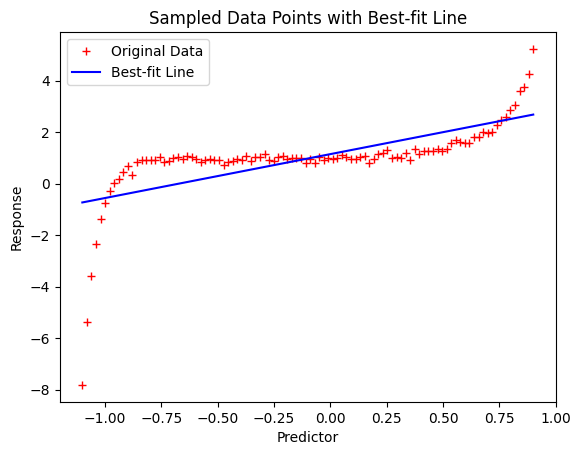

In [7]:
model_lin = LR()

model_lin.fit(predictor, response)

y_pred_lin= model_lin.predict(predictor)

plt.plot(predictor, response, 'r+', label='Original Data')
plt.plot(predictor, y_pred_lin, label='Best-fit Line', color='blue')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points with Best-fit Line')
plt.legend()
plt.show()

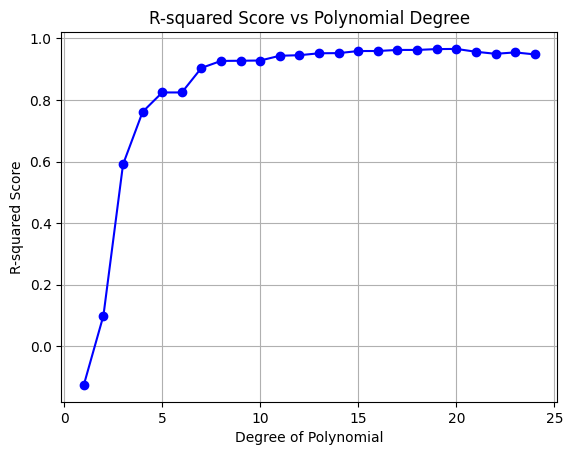

In [8]:
degrees = np.arange(1, 25)
r2_scores = []

for degree in degrees:
    poly_reg = PolynomialRegression()
    poly_reg.fit(predictor, response, degree)
    y_pred_poly = poly_reg.predict(predictor)
    r2 = r2_score(response, y_pred_poly)
    r2_scores.append(r2)

plt.plot(degrees, r2_scores, marker='o', color='blue')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R-squared Score')
plt.title('R-squared Score vs Polynomial Degree')
plt.grid(True)
plt.show()


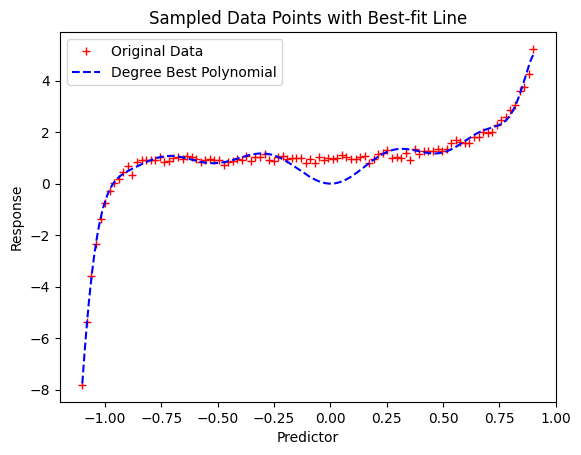

In [12]:
poly_reg_25 = PolynomialRegression()
poly_reg_25.fit(predictor, response, 13)
x_values_poly = np.linspace(min(predictor), max(predictor), 1000)
y_values_poly = poly_reg_25.predict(x_values_poly)
plt.plot(predictor, response, 'r+', label='Original Data')

plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points with Best-fit Line')
plt.plot(x_values_poly, y_values_poly, color='blue', linestyle='--', label='Degree Best Polynomial')

plt.legend()
plt.show()



In [13]:
best_degree = 13

ridge_reg = RidgeRegression(alpha=0.1)
ridge_reg.fit(predictor, response, best_degree)
x_values_ridge = np.linspace(min(predictor), max(predictor), 1000)
y_values_ridge = ridge_reg.predict(x_values_ridge)

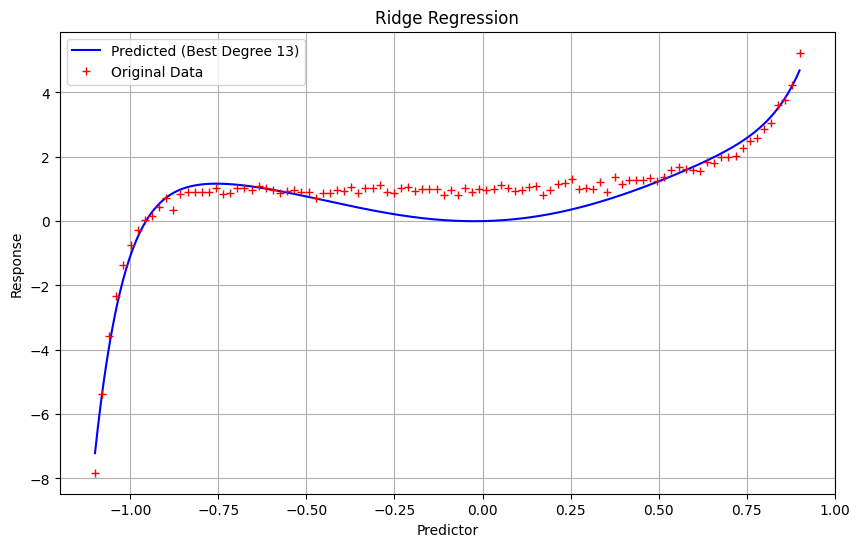

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x_values_ridge, y_values_ridge, color='blue', label=f'Predicted (Best Degree {best_degree})')
plt.plot(predictor, response, 'r+', label='Original Data')

plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
best_degree = 13

lasso_reg = LassoRegression(alpha=0.1)
lasso_reg.fit(predictor, response, best_degree)

x_values_lasso = np.linspace(min(predictor), max(predictor), 1000)
y_values_lasso = lasso_reg.predict(x_values_lasso)

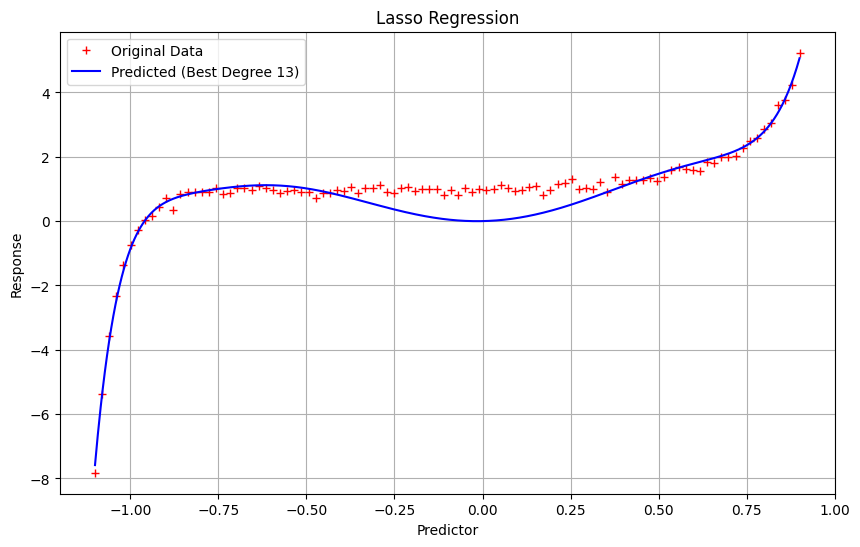

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(predictor, response, 'r+', label='Original Data')
plt.plot(x_values_lasso, y_values_lasso, color='blue', label=f'Predicted (Best Degree {best_degree})')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
print(r2_scores)

[-0.12548005845942933, 0.09961692539487133, 0.5908626668779133, 0.761499397546692, 0.8245056885759793, 0.8245103479267775, 0.9042425492837382, 0.9269456928721795, 0.9275154273818434, 0.9282531233013275, 0.9437485581300757, 0.9455206534362701, 0.9517553246075853, 0.9523147056437863, 0.9590880316336005, 0.9591478375355212, 0.9626171020771909, 0.9626571169849978, 0.9653785865305642, 0.9659191658150392, 0.9566961570158073, 0.9500597625904826, 0.9545998890400853, 0.948112242393017]


#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

In [ ]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [ ]:
# your code here

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [ ]:
credit = pd.read_csv('credit.csv')
credit.head(10)

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331
5,80.180,8047,569,4,77,10,1151
6,20.996,3388,259,2,37,12,203
7,71.408,7114,512,2,87,9,872
8,15.125,3300,266,5,66,13,279
9,71.061,6819,491,3,41,19,1350


In [ ]:
data = pd.read_csv('credit.csv')

print(data.head())

X = data[[ 'Income', 'Rating', 'Cards', 'Age', 'Education']].values

y = data['Balance'].values

In [ ]:
class MLR:
  def __init__(self):
    self.coef = None
    self.intercept=None
  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)

    betas=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
    self.intercept = betas[0]
    self.coef =betas[1:]

  def predict(self,X_test):
    y_pred = np.dot(X_test,self.coef) + self.intercept
    return y_pred


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
mlr=MLR()

In [ ]:
mlr.fit(X_train,y_train)


In [ ]:
y_pred=mlr.predict(X_test)

In [ ]:
mlr.coef

In [ ]:
mlr.intercept

In [ ]:
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
r_squared = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) score:", r_squared)

In [ ]:


data['Rating_Age'] = data['Rating'] * data['Age']

X = data[['Income', 'Rating', 'Cards', 'Age', 'Education', 'Rating_Age']].values
y = data['Balance'].values
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=2)





In [ ]:
mlr1=MLR()
mlr1.fit(X_train1,y_train1)
y_pred1=mlr1.predict(X_test1)

In [ ]:
mse1 = np.mean((y_test1 - y_pred1) ** 2)
rmse1 = np.sqrt(mse1)
r_squared1 = 1 - (np.sum((y_test1 - y_pred1) ** 2) / np.sum((y_test1 - np.mean(y_test1)) ** 2))

print("Mean Squared Error (MSE):", mse1)
print("Root Mean Squared Error (RMSE):", rmse1)
print("R-squared (R^2) score:", r_squared1)

### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [45]:
# sharks = pd.read_csv('shark_attacks.csv')
# sharks.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('shark_attacks.csv')
print(data)
X = data[['Year', 'Month', 'Temperature', 'IceCreamSales']].values
y = data['SharkAttacks'].values

In [ ]:
class MLR:
  def __init__(self):
    self.coef = None
    self.intercept=None
  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)

    betas=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
    self.intercept = betas[0]
    self.coef =betas[1:]

  def predict(self,X_test):
    y_pred = np.dot(X_test,self.coef) + self.intercept
    return y_pred

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlr = MLR()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

In [ ]:
#including ICECREAM

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

In [ ]:
#Excluding ICECREAM

X1 =data[['Year', 'Month', 'Temperature']].values
y = data['SharkAttacks'].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)
mlr1 = MLR()
mlr1.fit(X_train1, y_train1)
y_pred1 = mlr1.predict(X_test1)

In [ ]:
#Excluding ICECREAM
r21 = r2_score(y_test1, y_pred1)

mse1 = mean_squared_error(y_test1, y_pred1)

print("R^2 Score:", r21)
print("Mean Squared Error:", mse1)